In [1]:
# packages and scripts
import pickle
import numpy as np
import pandas as pd
import seaborn as sns
import statsmodels.api as sm
from statsmodels.formula.api import ols
from statsmodels.stats.multicomp import pairwise_tukeyhsd
from matplotlib import pyplot as plt
import scripts.plotting as plot


# load data
data = pd.read_csv('data/clean/clean_data.csv')


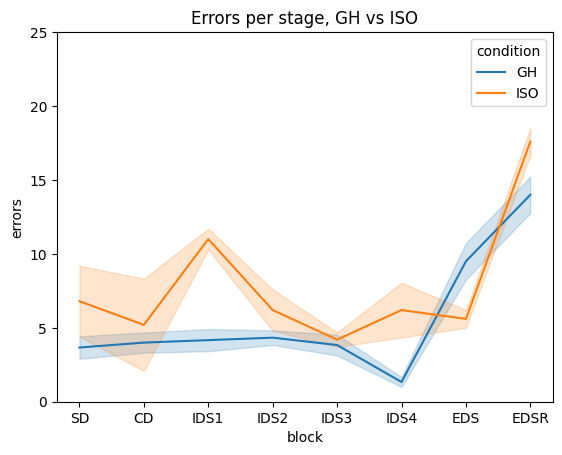

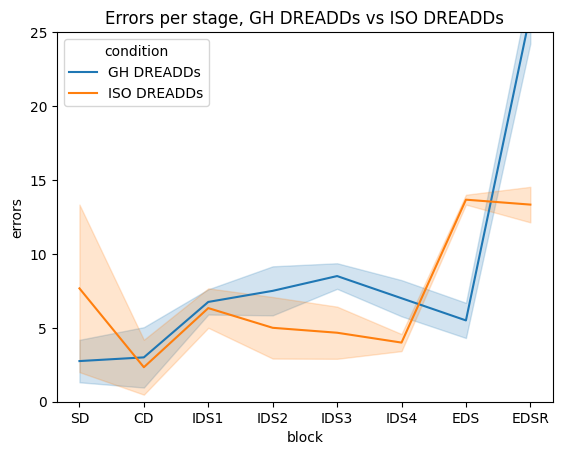

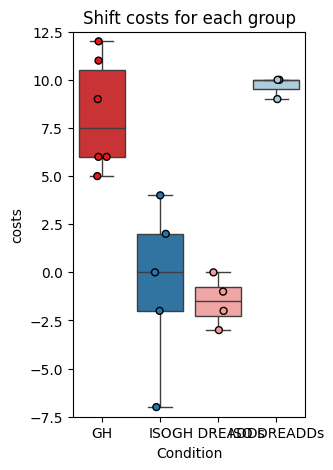

In [5]:
blocks = ['SD', 'CD', 'IDS1', 'IDS2', 'IDS3', 'IDS4', 'EDS', 'EDSR']
groups = ['GH', 'ISO', 'GH DREADDs', 'ISO DREADDs']


# function returns shift costs df so assign those
shift_costs = plot.group_level_plots(data, groups, blocks)

In [3]:
import statsmodels.api as sm
from statsmodels.formula.api import ols
from statsmodels.stats.multicomp import pairwise_tukeyhsd

# ANOVA analysis on shift costs
shift_costs_lm = ols('costs ~ condition_y',data=shift_costs).fit()
table = sm.stats.anova_lm(shift_costs_lm, typ=2) # Type 2 ANOVA DataFrame
print(table)

# now do post hoc test
tukey_oneway = pairwise_tukeyhsd(endog = shift_costs['costs'], groups = shift_costs['condition_y'])
print(tukey_oneway.summary())

# get means
shift_costs = shift_costs.groupby('condition_x')
print(shift_costs['costs'].mean())
print(shift_costs['costs'].std())



             sum_sq    df          F    PR(>F)
condition_y   426.8   3.0  16.639376  0.000068
Residual      119.7  14.0        NaN       NaN
     Multiple Comparison of Means - Tukey HSD, FWER=0.05      
  group1      group2   meandiff p-adj   lower    upper  reject
--------------------------------------------------------------
        GH  GH DREADDs  -9.6667 0.0008 -15.1527 -4.1806   True
        GH         ISO  -8.7667 0.0011  -13.913 -3.6203   True
        GH ISO DREADDs      1.5 0.8853  -4.5096  7.5096  False
GH DREADDs         ISO      0.9 0.9668  -4.8012  6.6012  False
GH DREADDs ISO DREADDs  11.1667  0.001   4.6755 17.6578   True
       ISO ISO DREADDs  10.2667 0.0014   4.0599 16.4734   True
--------------------------------------------------------------
condition_x
GH             8.166667
GH DREADDs    -1.500000
ISO           -0.600000
ISO DREADDs    9.666667
Name: costs, dtype: float64
condition_x
GH             2.926887
GH DREADDs     1.290994
ISO            4.219005
ISO DREAD

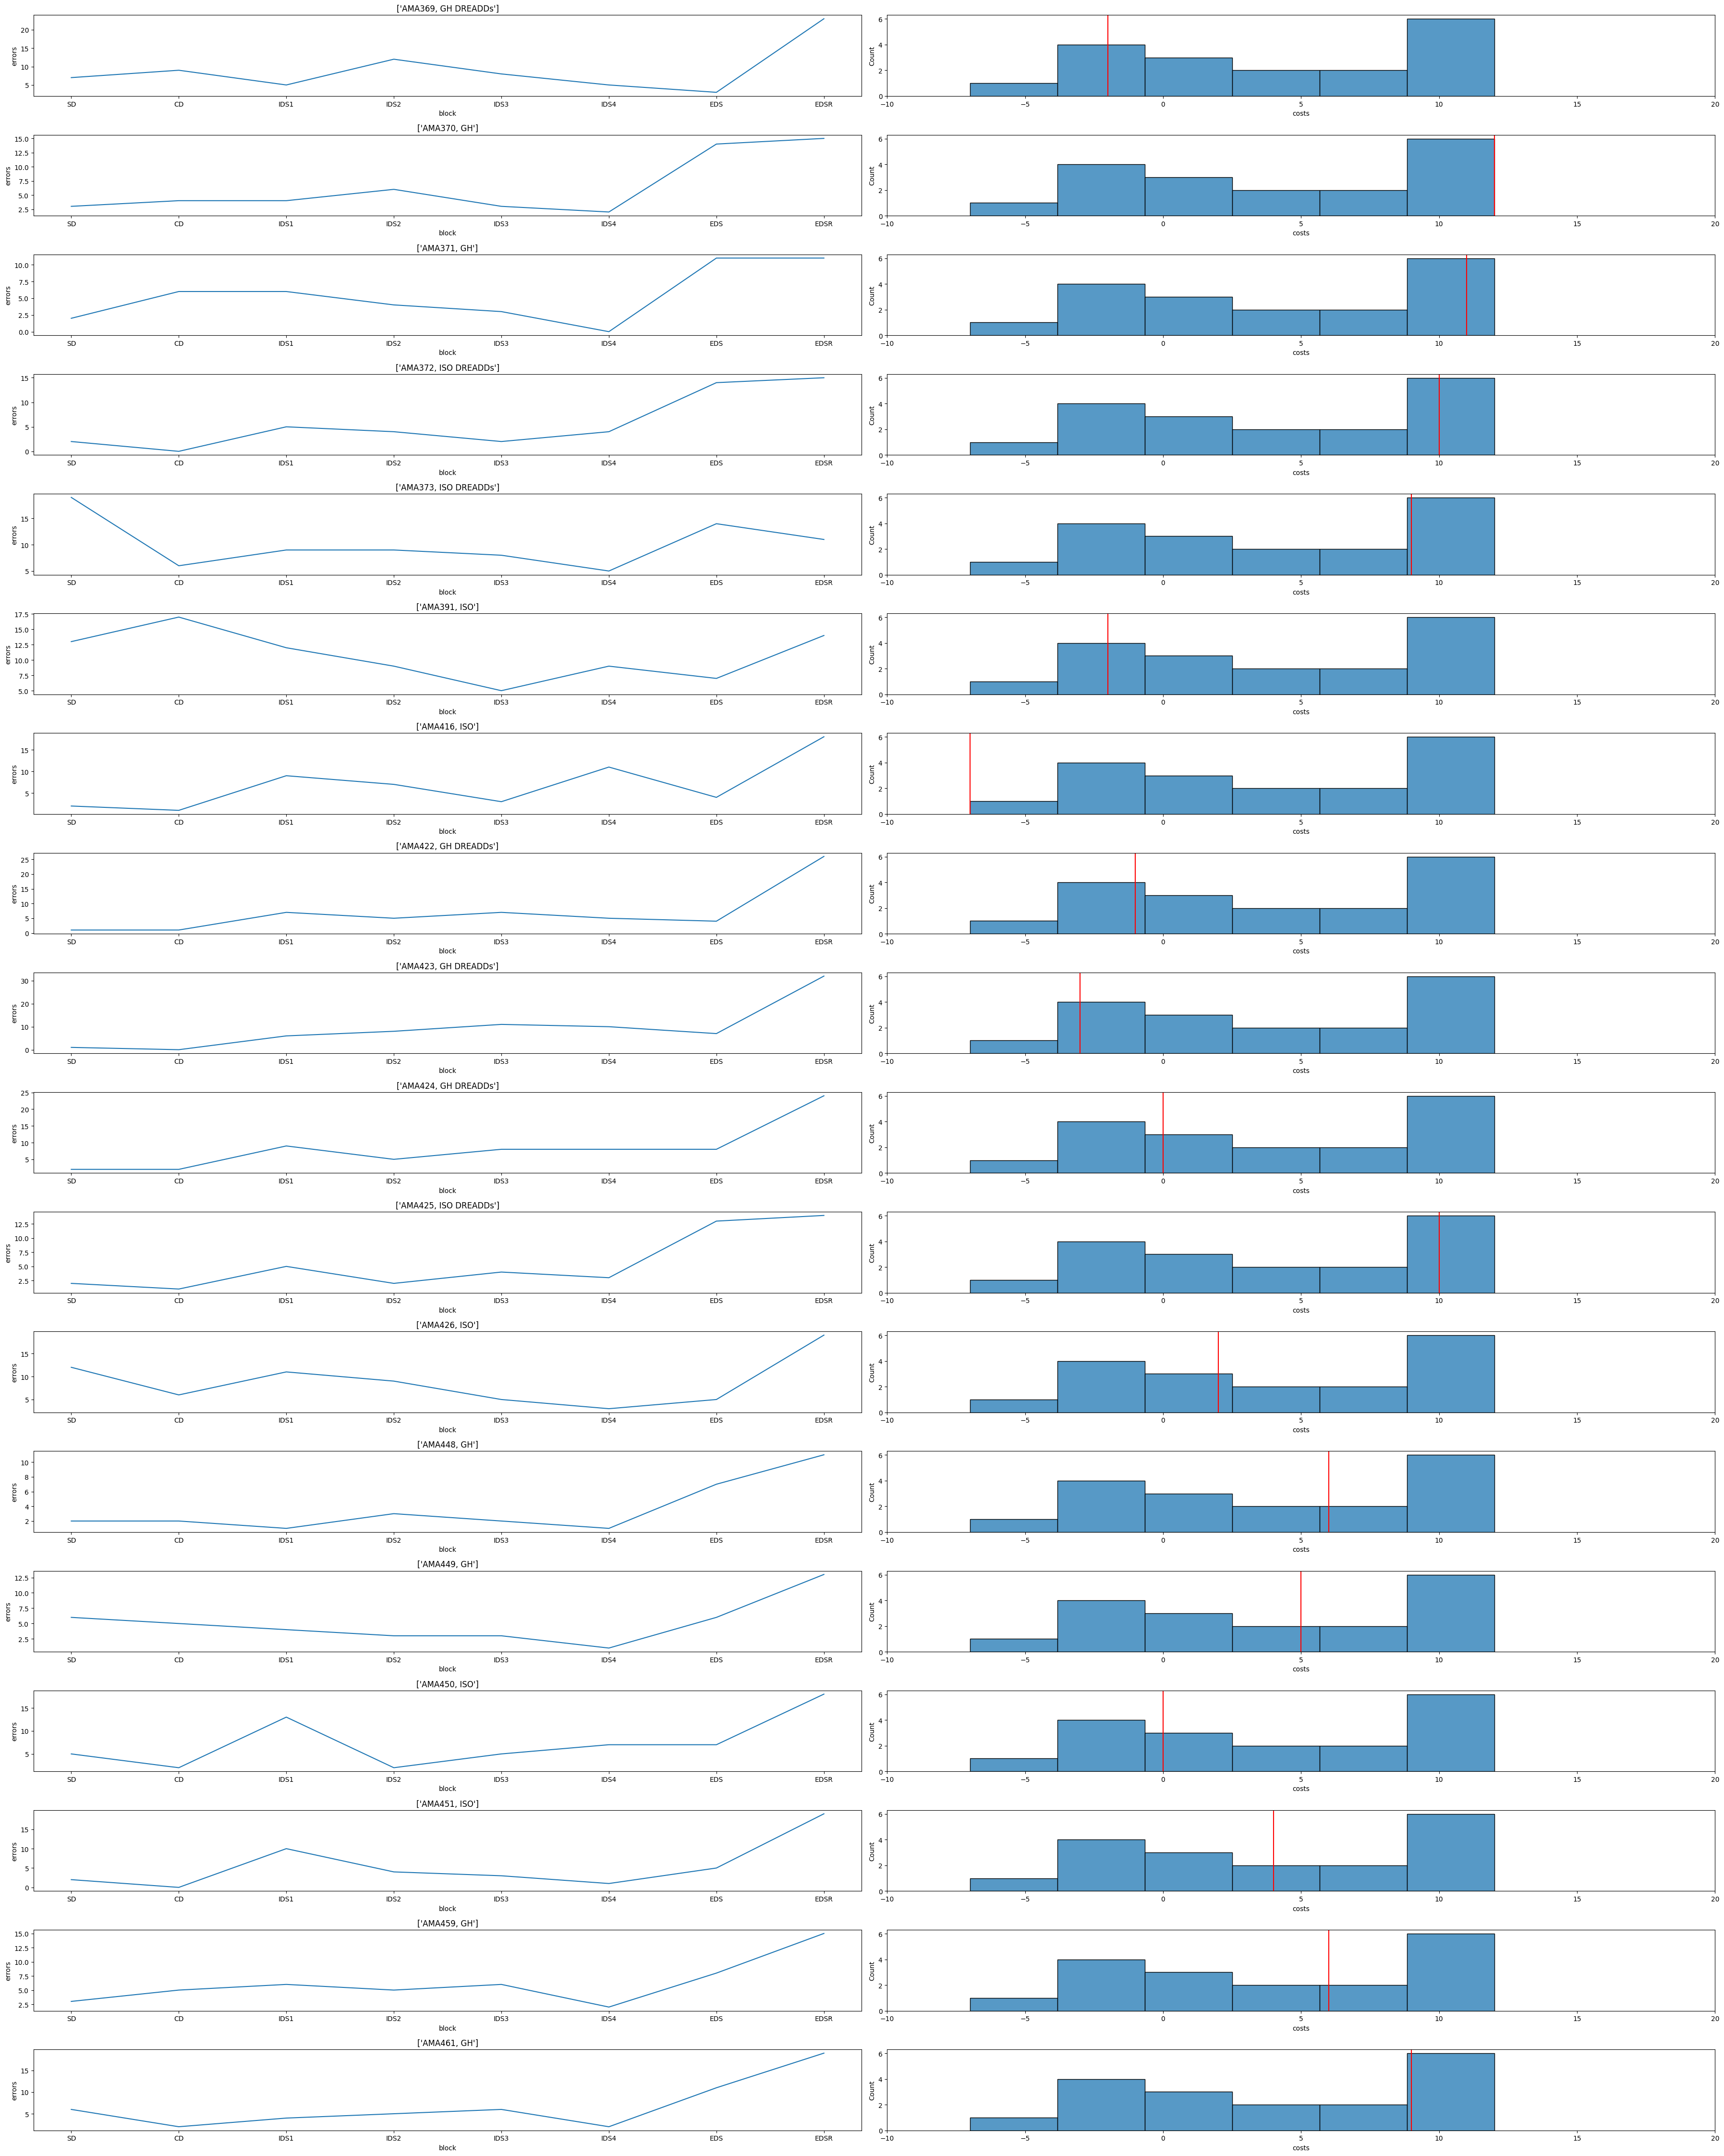

In [4]:
# let's just plot the GH behaviour 
groups = ['GH','ISO','ISO DREADDs','GH DREADDs']
plot.individual_plots(data, groups, blocks)

Text(0, 0.5, 'Incorrect choices % (excluding final 8 trials)')

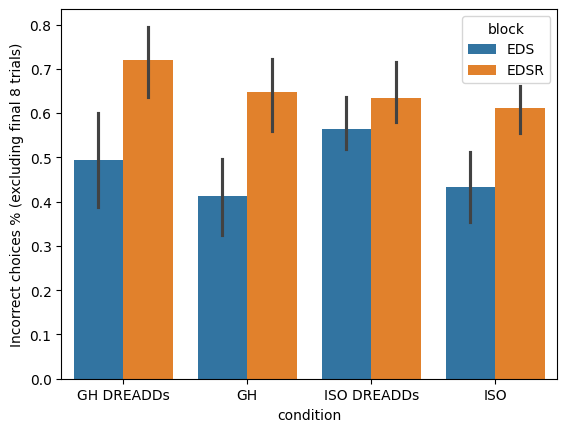

In [51]:
## let's analyse the distribution of errors in the EDS and EDSR for the different groups
blocks = ['EDS', 'EDSR']
tmp_df = data[['C', 'reward_loc','block', 'mouse', 'condition']].copy()
tmp_df['correct'] = (tmp_df['C'] == tmp_df['reward_loc']).astype(int)
tmp_df = tmp_df[tmp_df['block'].isin(blocks)]

tmp_df['trial_nr'] = tmp_df.groupby(['mouse', 'block']).cumcount()+1
tmp_df = tmp_df[tmp_df.groupby(['mouse', 'block'])['trial_nr'].transform('max') - tmp_df['trial_nr'] >= 8]
ratios = tmp_df.groupby(['mouse', 'block', 'condition'])['correct'].value_counts(normalize=True).unstack(fill_value=0).reset_index()

fig = sns.barplot(ratios, x='condition', y=0, hue='block')
fig.set_ylabel('Incorrect choices % (excluding final 8 trials)')
